In [ ]:
!pip install ktrain

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import ktrain
from ktrain import text

In [ ]:
df_tr = pd.read_csv('/content/drive/MyDrive/kannada_sentiment_full_train.tsv', sep='\t')
df_tt = pd.read_csv('/content/drive/MyDrive/kannada_sentiment_full_dev.tsv', sep='\t')

In [ ]:
def demoji(text):
	emoji_pattern = re.compile("["
		u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U00010000-\U0010ffff"
	"]+", flags=re.UNICODE)
	return(emoji_pattern.sub(r'', text))

In [ ]:
import re 

df_tr['text'] = df_tr['text'].apply(lambda x: demoji(x))
df_tr['text'] = df_tr['text'].str.replace('\d+', '')

df_tt['text'] = df_tt['text'].apply(lambda x: demoji(x))
df_tt['text'] = df_tt['text'].str.replace('\d+', '')

In [ ]:
(X_train, y_train), (X_test, y_test), preprocess = text.texts_from_df(train_df=df_tr, text_column='text', label_columns='category', val_df=df_tt, maxlen=64, preprocess_mode='bert')

['Mixed feelings', 'Negative', 'Positive', 'not-Kannada', 'unknown state']
   Mixed feelings  Negative  Positive  not-Kannada  unknown state
0             0.0       1.0       0.0          0.0            0.0
1             0.0       0.0       1.0          0.0            0.0
2             0.0       0.0       0.0          1.0            0.0
3             0.0       1.0       0.0          0.0            0.0
4             0.0       0.0       1.0          0.0            0.0
['Mixed feelings', 'Negative', 'Positive', 'not-Kannada', 'unknown state']
   Mixed feelings  Negative  Positive  not-Kannada  unknown state
0             1.0       0.0       0.0          0.0            0.0
1             0.0       0.0       1.0          0.0            0.0
2             0.0       0.0       0.0          1.0            0.0
3             0.0       0.0       1.0          0.0            0.0
4             0.0       0.0       1.0          0.0            0.0
downloading pretrained BERT model (multi_cased_L-12_H-768_

Is Multi-Label? False
preprocessing test...
language: kn


In [ ]:
model = text.text_classifier(name='bert', train_data=(X_train, y_train), preproc=preprocess)

Is Multi-Label? False
maxlen is 64
done.


In [ ]:
# batch size is determined according to maxlen
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train), val_data=(X_test, y_test), batch_size=64)

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/3
98/98 [==============================] - 247s 2s/step - loss: 1.4669 - accuracy: 0.3571
Epoch 2/3
98/98 [==============================] - 218s 2s/step - loss: 2.1050 - accuracy: 0.4177
Epoch 3/3
98/98 [==============================] - 38s 368ms/step - loss: 19.8946 - accuracy: 0.2822


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


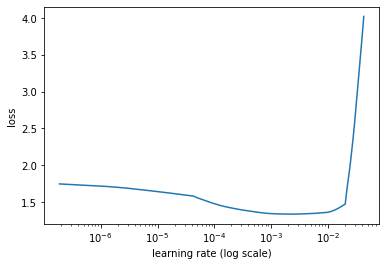

In [ ]:
learner.lr_find(max_epochs=3)
learner.lr_plot()

Two possible suggestions for LR from plot:
	Min numerical gradient: 6.25E-06
	Min loss divided by 10: 2.12E-04


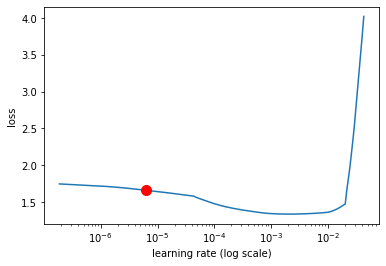

In [ ]:
learner.lr_plot(suggest=True)

In [ ]:
learner.fit_onecycle(lr=1e-4, epochs=5)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
98/98 [==============================] - 249s 2s/step - loss: 1.2386 - accuracy: 0.5048 - val_loss: 1.0209 - val_accuracy: 0.5977
Epoch 2/5
98/98 [==============================] - 220s 2s/step - loss: 1.0762 - accuracy: 0.5789 - val_loss: 1.0522 - val_accuracy: 0.5933
Epoch 3/5
98/98 [==============================] - 221s 2s/step - loss: 0.9359 - accuracy: 0.6407 - val_loss: 1.0514 - val_accuracy: 0.6208
Epoch 4/5
98/98 [==============================] - 220s 2s/step - loss: 0.6802 - accuracy: 0.7486 - val_loss: 1.0690 - val_accuracy: 0.6527
Epoch 5/5
98/98 [==============================] - 221s 2s/step - loss: 0.3860 - accuracy: 0.8566 - val_loss: 1.1983 - val_accuracy: 0.6570


In [ ]:
learner.validate(class_names=list(df_tr['category'].unique()))

                precision    recall  f1-score   support

      Negative       0.26      0.31      0.28        52
      Positive       0.68      0.60      0.64       139
   not-Kannada       0.72      0.79      0.75       321
Mixed feelings       0.70      0.64      0.67       110
 unknown state       0.58      0.43      0.50        69

      accuracy                           0.66       691
     macro avg       0.59      0.55      0.57       691
  weighted avg       0.66      0.66      0.66       691



array([[ 16,   9,  25,   0,   2],
       [ 13,  83,  36,   2,   5],
       [ 18,  24, 255,  19,   5],
       [  5,   4,  21,  70,  10],
       [ 10,   2,  18,   9,  30]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=preprocess)

In [ ]:
predictor.predict(['some text'])

# PART2 (Another approach where any other specific model can also be used)

In [ ]:
X_train, y_train = list(df_tr['text'].values), list(df_tr['category'].values)
X_test, y_test = list(df_tt['text'].values), list(df_tt['category'].values)

In [ ]:
model_name = 'distilbert-base-uncased'

In [ ]:
trans = text.Transformer(model_name, maxlen=64, class_names=list(df_tr['category'].unique()))

In [ ]:
train_data = trans.preprocess_train(X_train, y_train)
val_data = trans.preprocess_train(X_test, y_test)

preprocessing train...
language: kn
train sequence lengths:
	mean : 8
	95percentile : 21
	99percentile : 43


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:600: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing train...
language: kn
train sequence lengths:
	mean : 8
	95percentile : 23
	99percentile : 40


Is Multi-Label? False


In [ ]:
model = trans.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=train_data, val_data=val_data, batch_size=64)

In [ ]:
learner.lr_find(show_plot=True, max_epochs=5)

In [ ]:
learner.fit_onecycle(2e-5, 5)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/5
98/98 [==============================] - 39s 388ms/step - loss: 1.1480 - accuracy: 0.5620 - val_loss: 1.0495 - val_accuracy: 0.5847
Epoch 2/5
98/98 [==============================] - 40s 399ms/step - loss: 1.0755 - accuracy: 0.5874 - val_loss: 1.0017 - val_accuracy: 0.6266
Epoch 3/5
98/98 [==============================] - 40s 396ms/step - loss: 0.9842 - accuracy: 0.6349 - val_loss: 0.9956 - val_accuracy: 0.6049
Epoch 4/5
98/98 [==============================] - 40s 396ms/step - loss: 0.8675 - accuracy: 0.6882 - val_loss: 0.9494 - val_accuracy: 0.6440
Epoch 5/5
98/98 [==============================] - 40s 398ms/step - loss: 0.7680 - accuracy: 0.7291 - val_loss: 0.9717 - val_accuracy: 0.6440


In [ ]:
learner.validate(class_names=list(df_tr['category'].unique()))

                precision    recall  f1-score   support

      Negative       0.00      0.00      0.00        52
      Positive       0.58      0.58      0.58       139
   not-Kannada       0.68      0.79      0.73       321
Mixed feelings       0.75      0.67      0.71       110
 unknown state       0.47      0.52      0.49        69

      accuracy                           0.64       691
     macro avg       0.49      0.51      0.50       691
  weighted avg       0.60      0.64      0.62       691



array([[  0,  12,  32,   1,   7],
       [  0,  81,  54,   0,   4],
       [  1,  36, 254,  17,  13],
       [  0,   3,  16,  74,  17],
       [  0,   8,  18,   7,  36]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [ ]:
predictor.predict(['some text'])